## **Iris dataset**
In this notebook I do a simple example with the Iris dataset

In [1]:
# Mostly taken from
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Get the dataset content
x = iris.data # the data
feature_names = iris.feature_names # the feature names
y = iris.target # the labels {0, 1, 2}
target_names = iris.target_names # the labels names
labels = list(range(len(target_names))) # a list of labels [0, 1, 2]

# Create a DataFrame with it.
data = dict(
    [(n, x[:,i]) for i, n in enumerate(feature_names)] +
    [("flower name", target_names[y]), ("label", y)]
  )
df_iris = pd.DataFrame(data)

# Display the dataset content
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower name,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


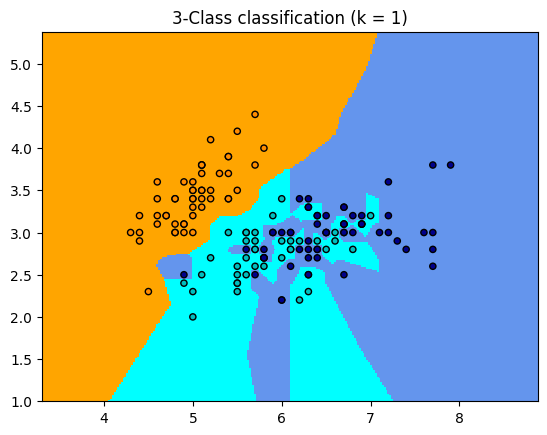

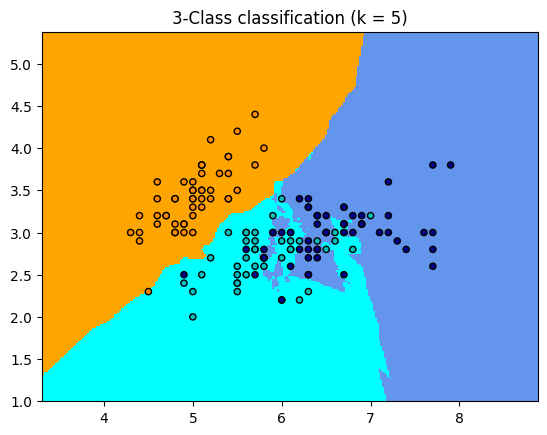

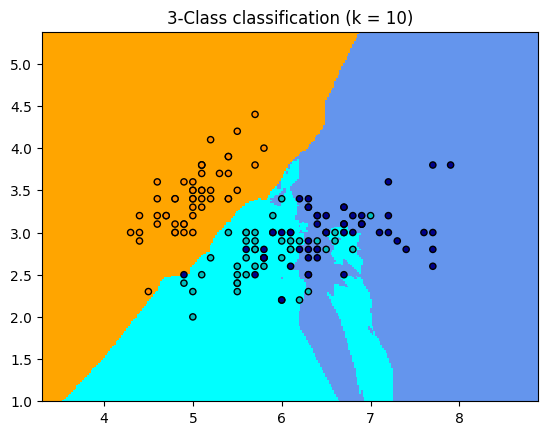

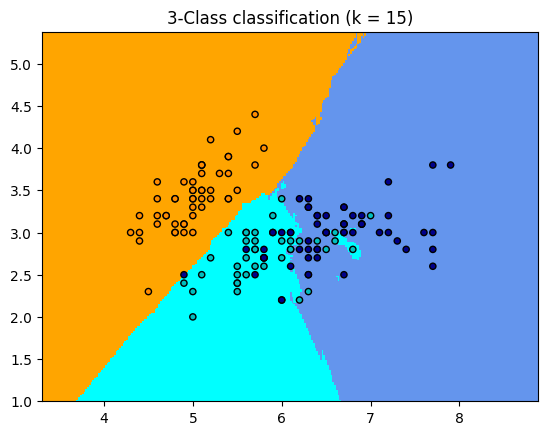

In [ ]:
# We will only take the first two dimensions of x for easy display
x_2 = x[:, :2]

# Step size in the mesh
h = .02

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# For several ks in knn
for n_neighbors in [1, 5, 10, 15]:

    # Create an instance of Neighbours Classifier
    clf = KNeighborsClassifier(n_neighbors)
    # Fit the data
    clf.fit(x_2, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x_2[:, 0].min() - 1, x_2[:, 0].max() + 1
    y_min, y_max = x_2[:, 1].min() - 1, x_2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_2[:, 0], x_2[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))

plt.show()